# **CITY BIKE API**

### **ABOUT CITY BIKE API**

The city bike API is a  project that provides bike sharing data for apps, research and projects to use. To date Citybikes supports more than 400 cities and the Citybikes API is the most widely used dataset for building bike sharing transportation projects.

In [44]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# API url
url = "http://api.citybik.es/v2/networks"

In [21]:
# parsed the data as JSON
response = requests.get(url).json()
# prints first 5 values
response['networks'][:5]

[{'company': ['ЗАО «СитиБайк»'],
  'href': '/v2/networks/velobike-moscow',
  'id': 'velobike-moscow',
  'location': {'city': 'Moscow',
   'country': 'RU',
   'latitude': 55.75,
   'longitude': 37.616667},
  'name': 'Velobike'},
 {'company': ['Comunicare S.r.l.'],
  'href': '/v2/networks/bicincitta-siena',
  'id': 'bicincitta-siena',
  'location': {'city': 'Siena',
   'country': 'IT',
   'latitude': 43.3186,
   'longitude': 11.3306},
  'name': 'Bicincittà',
  'source': 'https://www.bicincitta.com/frmLeStazioni.aspx?ID=202'},
 {'company': ['Cyclopolis Systems'],
  'href': '/v2/networks/cyclopolis-maroussi',
  'id': 'cyclopolis-maroussi',
  'location': {'city': 'Maroussi',
   'country': 'GR',
   'latitude': 38.0568722388,
   'longitude': 23.8083299536},
  'name': 'Cyclopolis'},
 {'company': ['Cyclopolis Systems'],
  'href': '/v2/networks/cyclopolis-nafplio',
  'id': 'cyclopolis-nafplio',
  'location': {'city': 'Nafplio',
   'country': 'GR',
   'latitude': 37.5639397319,
   'longitude': 22

> From the documentation, the API provides field filtering parameter and from the list of features in the JSON formatted data, I am interested in the name of the company providing the bike and the location of the company.

In [22]:
# API url with the filter parameter
urlFilter = "http://api.citybik.es/v2/networks?fields=name,location"

In [23]:
# parsed the data as JSON
responseFilter = requests.get(urlFilter).json()
# prints first 5 values
responseFilter['networks'][:5]

[{'location': {'city': 'Moscow',
   'country': 'RU',
   'latitude': 55.75,
   'longitude': 37.616667},
  'name': 'Velobike'},
 {'location': {'city': 'Siena',
   'country': 'IT',
   'latitude': 43.3186,
   'longitude': 11.3306},
  'name': 'Bicincittà'},
 {'location': {'city': 'Maroussi',
   'country': 'GR',
   'latitude': 38.0568722388,
   'longitude': 23.8083299536},
  'name': 'Cyclopolis'},
 {'location': {'city': 'Nafplio',
   'country': 'GR',
   'latitude': 37.5639397319,
   'longitude': 22.8093402872},
  'name': 'Cyclopolis'},
 {'location': {'city': 'Parco dei Colli di Bergamo',
   'country': 'IT',
   'latitude': 45.72295637032245,
   'longitude': 9.649230073016383},
  'name': 'Bicincittà'}]

> The result above shows that location information is stored in a dictionary.

## **PUT INFORMATION INTO A TABLE**

In [24]:
# create main dataframe
bikeData = pd.DataFrame()

# loop through the JSON formatted data
for i in range(len(responseFilter['networks'])):
    # create a temporary dataframe
    temp = pd.DataFrame(
        {
            'Name': [responseFilter['networks'][i]['name']],
            'Country': [responseFilter['networks'][i]['location']['country']],
            'City': [responseFilter['networks'][i]['location']['city']],
            'Latitude': [responseFilter['networks'][i]['location']['latitude']],
            'Longitude': [responseFilter['networks'][i]['location']['longitude']]
        }
    )

    # concatenate the temporary dataframe with the earlier created dataframe
    bikeData = pd.concat([bikeData, temp], ignore_index=True)

bikeData.head()

,Name,Country,City,Latitude,Longitude
0,Velobike,RU,Moscow,55.750000,37.616667
1,Bicincittà,IT,Siena,43.318600,11.330600
2,Cyclopolis,GR,Maroussi,38.056872,23.808330
3,Cyclopolis,GR,Nafplio,37.563940,22.809340
4,Bicincittà,IT,Parco dei Colli di Bergamo,45.722956,9.649230


## **EXPLORATORY DATA ANALYSIS**

In [25]:
bikeData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       770 non-null    object 
 1   Country    770 non-null    object 
 2   City       770 non-null    object 
 3   Latitude   770 non-null    float64
 4   Longitude  770 non-null    float64
dtypes: float64(2), object(3)
memory usage: 30.2+ KB


> The result shows there are 770 rows and 5 features, no missing values, also the datatype of each feature appears to be appropriate.

#### **HOW MANY UNIQUE COUNTRIES AND CITIES ARE IN THE DATAFRAME?**

In [26]:
bikeData['Country'].nunique()

57

In [27]:
bikeData['City'].nunique()

750

> The outputs from the above cells tells that some countries and cities occurred more than once in the DataFrame, it would be a great idea to check for duplicates in the dataset so it doesn't affect the outcome of the analysis.

#### **CHECK FOR DUPLICATES IN THE DATASET**

In [28]:
bikeData.duplicated().sum()

0

> Even though the dataset have some countries and cities repeated, the result shows that there are no duplicate datapoint in the dataset.

## **DATA VISUALIZATION**

> Exploring the data as visuals

In [41]:
# sort values in ascending order and gets the index
country_count = bikeData['Country'].value_counts().index 

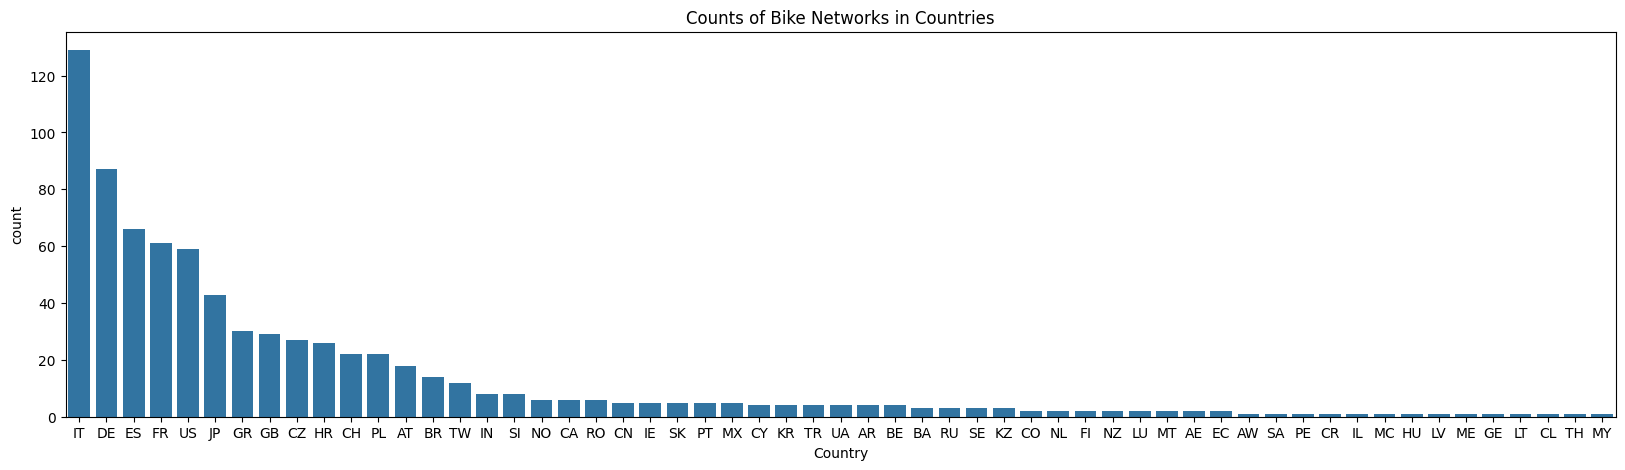

In [47]:
plt.figure(figsize=(20, 5)) # changes the figure size
sns.countplot(data=bikeData, x=bikeData['Country'], order=country_count);
plt.title('Counts of Bike Networks in Countries');

### **TOP 10 COUNTRIES WITH BIKE NETWORKS**

In [72]:
top10countries = bikeData.groupby('Country').count().sort_values(by='Name', ascending=False)\
                    .reset_index()[:10]

In [73]:
top10countries

,Country,Name,City,Latitude,Longitude
0,IT,129,129,129,129
1,DE,87,87,87,87
2,ES,66,66,66,66
3,FR,61,61,61,61
4,US,59,59,59,59
5,JP,43,43,43,43
6,GR,30,30,30,30
7,GB,29,29,29,29
8,CZ,27,27,27,27
9,HR,26,26,26,26


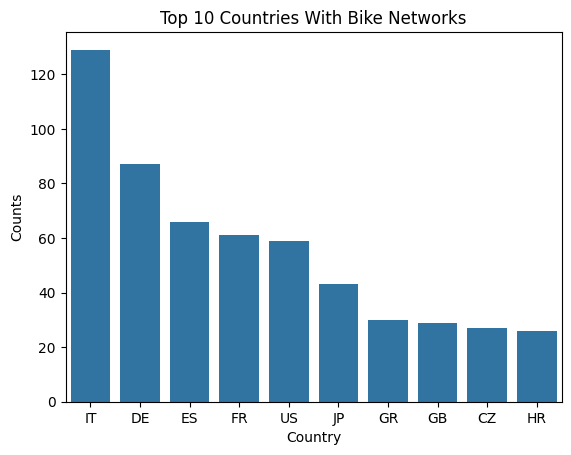

In [77]:
sns.barplot(data=top10countries, x=top10countries['Country'], y=top10countries['Name']);
plt.title('Top 10 Countries With Bike Networks');
plt.ylabel('Counts');

# **LOOKING INTO A PARTICULAR COMPANY**